In [1]:
import pandas as pd
import numpy as np



READ DATASET

In [2]:
data_train = pd.read_csv("case_cost_prediction_train.csv")
data_test = pd.read_csv("case_cost_prediction_val.csv")


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57971 entries, 0 to 57970
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row_id        57971 non-null  int64  
 1   tglpelayanan  57971 non-null  object 
 2   kddati2       57971 non-null  int64  
 3   tkp           57971 non-null  int64  
 4   peserta       57971 non-null  int64  
 5   a             57971 non-null  int64  
 6   b             57971 non-null  int64  
 7   c             57971 non-null  int64  
 8   cb            57971 non-null  int64  
 9   d             57971 non-null  int64  
 10  ds            57971 non-null  int64  
 11  gd            57971 non-null  int64  
 12  hd            57971 non-null  int64  
 13  i1            57971 non-null  int64  
 14  i2            57971 non-null  int64  
 15  i3            57971 non-null  int64  
 16  i4            57971 non-null  int64  
 17  kb            57971 non-null  int64  
 18  kc            57971 non-nu

PRE PROCESSING

In [4]:
data_train['unit_cost']=data_train['unit_cost'].astype(int) 

In [5]:
Data_proses = data_train
Data_Benar = pd.to_datetime(Data_proses["tglpelayanan"],format = "%Y-%m-%d %H:%M:%S", errors='coerce')

In [6]:
Data_Benar = Data_Benar.astype('int64')
Data_Benar

0        1396310400000000000
1        1477958400000000000
2        1462060800000000000
3        1541030400000000000
4        1569888000000000000
                ...         
57966    1551398400000000000
57967    1567296000000000000
57968    1464739200000000000
57969    1514764800000000000
57970    1472688000000000000
Name: tglpelayanan, Length: 57971, dtype: int64

In [7]:
datatrue = pd.concat([data_train['row_id'],data_train.iloc[:,2:36]], axis=1)
datatrue

,row_id,kddati2,tkp,peserta,a,b,c,cb,d,ds,...,kp,kt,ku,s,sa,sb,sc,sd,case,unit_cost
0,1,332,40,179530,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,266,3597439
1,2,54,40,104782,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,2453,4951007
2,3,323,30,280645,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1690,198420
3,4,318,40,178685,0,1,0,0,0,0,...,0,0,0,0,0,0,0,3,1321,4008756
4,5,150,30,1199321,1,0,1,0,0,0,...,1,0,0,0,0,1,0,5,73056,307227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57966,57967,241,40,157213,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,410,3443331
57967,57968,338,30,402173,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,8272,212862
57968,57969,241,40,99401,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,294,3028610
57969,57970,147,40,509495,0,0,1,0,0,0,...,0,0,0,0,0,0,2,0,1983,3629364


In [8]:
Data_Benar = pd.concat([Data_Benar,datatrue.iloc[:,0:36]], axis=1)
Data_Benar

,tglpelayanan,row_id,kddati2,tkp,peserta,a,b,c,cb,d,...,kp,kt,ku,s,sa,sb,sc,sd,case,unit_cost
0,1396310400000000000,1,332,40,179530,0,0,1,0,1,...,0,0,0,0,0,0,0,0,266,3597439
1,1477958400000000000,2,54,40,104782,0,1,0,0,0,...,0,0,1,0,0,0,1,1,2453,4951007
2,1462060800000000000,3,323,30,280645,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1690,198420
3,1541030400000000000,4,318,40,178685,0,1,0,0,0,...,0,0,0,0,0,0,0,3,1321,4008756
4,1569888000000000000,5,150,30,1199321,1,0,1,0,0,...,1,0,0,0,0,1,0,5,73056,307227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57966,1551398400000000000,57967,241,40,157213,0,0,1,0,0,...,0,0,0,0,0,0,0,0,410,3443331
57967,1567296000000000000,57968,338,30,402173,0,0,1,0,0,...,0,0,0,0,0,0,0,0,8272,212862
57968,1464739200000000000,57969,241,40,99401,0,0,1,0,0,...,0,0,0,0,0,0,0,0,294,3028610
57969,1514764800000000000,57970,147,40,509495,0,0,1,0,0,...,0,0,0,0,0,0,2,0,1983,3629364


In [9]:
x = Data_Benar.iloc[:,0:34]
y1 = Data_Benar.iloc[:,34:35]
y2 = Data_Benar.iloc[:,35:36]
x = x.drop(["row_id"], axis=1)

PROSES REGRESI

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

In [11]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x, y1,test_size=0.01,random_state=59)

In [12]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x, y2,test_size=0.01,random_state=59)

In [13]:
model_case_tree = DecisionTreeRegressor()

model_case_tree.fit(X1_train,y1_train)

DecisionTreeRegressor()

In [14]:
model_unit_cost_tree = DecisionTreeRegressor()

model_unit_cost_tree.fit(X2_train,y2_train)

DecisionTreeRegressor()

In [15]:
case = model_case_tree.predict(X1_test)
print(case)
case_semua_tree= model_case_tree.predict(x)
print(case_semua_tree)

[2.66800e+03 4.27200e+03 2.09900e+03 6.31700e+03 2.74000e+02 3.81000e+02
 2.07290e+04 1.72460e+04 6.15000e+02 7.83900e+03 4.58000e+02 6.26000e+02
 1.24000e+03 1.34000e+03 3.16000e+02 1.19600e+03 1.95100e+03 8.69000e+02
 1.48400e+03 1.43300e+03 2.11000e+02 2.03910e+04 4.74300e+03 3.03150e+04
 2.05100e+03 1.24700e+03 2.21200e+04 3.80200e+03 6.40000e+01 5.07800e+03
 3.55400e+03 3.20800e+03 2.74400e+03 4.65000e+02 6.38000e+02 2.57000e+02
 6.88800e+03 6.93600e+03 5.68300e+03 3.77000e+02 1.50000e+01 1.49670e+04
 8.95000e+02 4.48000e+02 8.00000e+01 5.31200e+03 1.90000e+01 1.22000e+02
 8.09000e+02 3.36500e+03 1.80800e+03 6.65000e+02 1.07000e+03 1.06400e+04
 2.28400e+03 2.15300e+03 2.35260e+04 1.94140e+04 1.58000e+02 1.32500e+03
 6.09900e+03 2.97000e+02 3.63000e+02 3.32000e+02 2.37780e+04 1.97000e+02
 1.57000e+02 1.21100e+03 1.00180e+04 3.19000e+02 1.37800e+03 1.85727e+05
 2.04000e+02 9.11300e+03 2.18370e+04 3.37200e+03 2.01000e+02 6.34600e+03
 1.45300e+03 1.42700e+03 2.86000e+02 4.09000e+02 1.

In [16]:
unit_cost = model_unit_cost_tree.predict(X2_test)
print(unit_cost)
unit_cost_semua_tree = model_unit_cost_tree.predict(x)
print(unit_cost_semua_tree)

[3906737.  259449.  214338.  267834. 3195371. 3601010.  246347.  353967.
  215027.  248246. 2928142.  209671. 4609652.  191659. 4209482.  173279.
 4504627. 3798198. 3907456.  203041.  168977.  277476.  280697.  283060.
 4644729.  310479.  311003.  216453. 2369795.  161810.  250759.  222900.
  194012. 3725262.  479529. 3156981. 3569935.  194621.  226648.  153250.
  216153.  267126. 3322076.  178518.  254059. 3752228. 1952430. 1976339.
 4926476.  212953. 2951556. 3199299. 3278122.  223635.  220094. 3737250.
  236911.  214660.  237583.  179080. 4379223.  156835. 2541913. 4407748.
  217787.  312834. 3426882. 3878544.  231921.  176561.  197815.  349621.
 2848352.  351977.  282672. 3935922. 2531179.  249679. 3921769.  190071.
  162770. 3255810. 4153890. 3565377.  239938. 5618424.  308355.  253165.
 2174283. 3527926. 4070485.  194283. 2351256.  238355. 6518146.  248103.
 3553620.  163546.  201243. 3363201.  246779. 4034138.  294714. 2563584.
 3654555.  277915. 3629467.  177921. 3271718.  3682

MAE CASE TREE

In [17]:
print(mean_absolute_error(y1,case_semua_tree))

6.988787497196874


MAE UNIT COST TREE

In [18]:
print(mean_absolute_error(y2,unit_cost_semua_tree))

829.2294423073606


MAPE CASE TREE

In [19]:
case_pred_tree =pd.DataFrame(case_semua_tree, columns=['predict_case']) 

In [20]:
y1_semua_tree,case_semuaa_tree = np.array(y1), np.array(case_pred_tree)

MAPE_CASE_TREE = np.mean(np.abs((y1_semua_tree - case_semuaa_tree) / y1_semua_tree))
MAPE_CASE_TREE

0.0015085606971261076

MAPE UNIT COST TREE

In [21]:
unit_cost_pred_tree =pd.DataFrame(unit_cost_semua_tree, columns=['predict_case']) 

In [22]:
y2_semua_tree,unit_cost_semuaa_tree = np.array(y2), np.array(unit_cost_pred_tree)

MAPE_UNIT_COST_TREE = np.mean(np.abs((y2_semua_tree - unit_cost_semuaa_tree ) / y2_semua_tree))
MAPE_UNIT_COST_TREE

0.00042122714112426043

NILAI BPJS TREE


In [23]:
(1 - (MAPE_CASE_TREE+ MAPE_UNIT_COST_TREE)/2)*1000

999.0351060808748

PROSES EXPORT CSV

DECISION TREE

In [24]:
casee_tree = y1
case_pred_tree2 =pd.DataFrame(case_semua_tree, columns=['predict_case']) 

unit_costt_tree = y2
unit_cost_pred_tree2 =pd.DataFrame(unit_cost_semua_tree, columns=['predict_unit_cost']) 

datagood_tree = pd.concat([ data_train['row_id'] ,casee_tree,case_pred_tree2,unit_costt_tree,unit_cost_pred_tree2], axis=1)
datagood_tree

,row_id,case,predict_case,unit_cost,predict_unit_cost
0,1,266,266.0,3597439,3597439.0
1,2,2453,2453.0,4951007,4951007.0
2,3,1690,1690.0,198420,198420.0
3,4,1321,1321.0,4008756,4008756.0
4,5,73056,73056.0,307227,307227.0
...,...,...,...,...,...
57966,57967,410,410.0,3443331,3443331.0
57967,57968,8272,8272.0,212862,212862.0
57968,57969,294,294.0,3028610,3028610.0
57969,57970,1983,1983.0,3629364,3629364.0


CSV TREE

In [25]:
datagood_tree.to_csv (r'TEAM02_case_cost_model_tree.csv', index = False, header=True)
print (datagood_tree)

       row_id   case  predict_case  unit_cost  predict_unit_cost
0           1    266         266.0    3597439          3597439.0
1           2   2453        2453.0    4951007          4951007.0
2           3   1690        1690.0     198420           198420.0
3           4   1321        1321.0    4008756          4008756.0
4           5  73056       73056.0     307227           307227.0
...       ...    ...           ...        ...                ...
57966   57967    410         410.0    3443331          3443331.0
57967   57968   8272        8272.0     212862           212862.0
57968   57969    294         294.0    3028610          3028610.0
57969   57970   1983        1983.0    3629364          3629364.0
57970   57971  16679       16679.0     295685           295685.0

[57971 rows x 5 columns]


DATA VALIDATION

In [26]:
Data_proses2 = data_test
Data_Benar2 = pd.to_datetime(Data_proses2["tglpelayanan"],format = "%Y-%m-%d %H:%M:%S", errors='coerce')

In [27]:
Data_Benar2 = Data_Benar2.astype('int64')
Data_Benar2

0        1580515200000000000
1        1406851200000000000
2        1393632000000000000
3        1493596800000000000
4        1441065600000000000
                ...         
24628    1472688000000000000
24629    1396310400000000000
24630    1420070400000000000
24631    1580515200000000000
24632    1527811200000000000
Name: tglpelayanan, Length: 24633, dtype: int64

In [28]:
datatrue2 = pd.concat([data_test['row_id'],data_test.iloc[:,2:36]], axis=1)
datatrue2

,row_id,kddati2,tkp,peserta,a,b,c,cb,d,ds,...,km,ko,kp,kt,ku,s,sa,sb,sc,sd
0,1,257,40,305959,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,228,30,214545,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
2,3,345,30,95774,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,6,30,194254,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,119,40,1231866,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24628,24629,83,40,182908,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24629,24630,191,30,515847,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24630,24631,131,40,1200565,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,8,2
24631,24632,143,40,790059,0,0,2,0,1,0,...,0,0,0,0,0,0,0,0,2,0


In [29]:
Data_Benar2 = pd.concat([Data_Benar2,datatrue2.iloc[:,0:36]], axis=1)
Data_Benar2 = Data_Benar2.drop(["row_id"], axis=1)
Data_Benar2


,tglpelayanan,kddati2,tkp,peserta,a,b,c,cb,d,ds,...,km,ko,kp,kt,ku,s,sa,sb,sc,sd
0,1580515200000000000,257,40,305959,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1406851200000000000,228,30,214545,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
2,1393632000000000000,345,30,95774,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1493596800000000000,6,30,194254,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1441065600000000000,119,40,1231866,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24628,1472688000000000000,83,40,182908,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24629,1396310400000000000,191,30,515847,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24630,1420070400000000000,131,40,1200565,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,8,2
24631,1580515200000000000,143,40,790059,0,0,2,0,1,0,...,0,0,0,0,0,0,0,0,2,0


DECISION TREE

In [30]:
case_semua_fix_tree=model_case_tree.predict(Data_Benar2)
predcasefix_tree = pd.DataFrame(case_semua_fix_tree, columns=['predict_case']) 

In [31]:
unit_cost_semua_fix_tree=model_unit_cost_tree.predict(Data_Benar2)
predunitcostfix_tree = pd.DataFrame(unit_cost_semua_fix_tree, columns=['predict_unit_cost']) 

In [32]:
data_fix_tree = pd.concat([ datatrue2['row_id']  ,predcasefix_tree,predunitcostfix_tree], axis=1)
data_fix_tree

,row_id,predict_case,predict_unit_cost
0,1,1022.0,3372716.0
1,2,4200.0,243582.0
2,3,738.0,162699.0
3,4,6130.0,257440.0
4,5,1914.0,4175124.0
...,...,...,...
24628,24629,1107.0,3326898.0
24629,24630,3278.0,173268.0
24630,24631,4301.0,4189420.0
24631,24632,4106.0,3400220.0


CSV VALIDATION TREE

In [33]:
data_fix_tree.to_csv (r'TEAM02_case_cost_model_batch2_tree.csv', index = False, header=True)
print (data_fix_tree)

       row_id  predict_case  predict_unit_cost
0           1        1022.0          3372716.0
1           2        4200.0           243582.0
2           3         738.0           162699.0
3           4        6130.0           257440.0
4           5        1914.0          4175124.0
...       ...           ...                ...
24628   24629        1107.0          3326898.0
24629   24630        3278.0           173268.0
24630   24631        4301.0          4189420.0
24631   24632        4106.0          3400220.0
24632   24633        5472.0           293466.0

[24633 rows x 3 columns]


In [34]:
import matplotlib.pyplot as plt

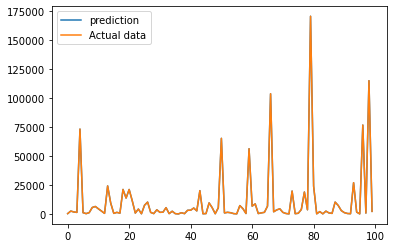

In [35]:
plt.plot(case_semua_tree[:100], label = 'prediction')
plt.plot(y1[:100], label = 'Actual data')
plt.legend()
plt.show()